# Final Project - Symbols in Modern Chinese Poetry

*Zhaodi Chen*

## Introduction

This is the notebook for my final project for Computational Content Analysis 2018.

My project is about the usage of symbols in modern Chinese poetry, with a focus on the symbole of SUN. My work contains four parts: 1) data preparation,2) word frequencies and proportions using `nltk`, 3) word-embedding and 4) semantic network.

My corpus contains 8744 poems in three time periods: 1920-1949, 1950-1979, 1980-2004.

## Data preparation

#### Web Scraping

The part of web scraping is done in python 2, to better handle the encoding problem. The following are python 2 codes.

In [ ]:
'''
import re
import json
import urllib
import urllib2
import sys
import bs4
import re
import xlwt

from bs4 import  BeautifulSoup
import time

#to fix the encoding problem
reload(sys)
type = sys.getfilesystemencoding()
sys.setdefaultencoding('utf8') 
import urllib2,socket
'''

In [ ]:
'''
#Define functions to request conent from the source page, parsing and writing files
def getcontent(url):
    try:
        request = urllib2.Request(url,'utf-8')
        headers = {'User-Agent':'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US; rv:1.9.1.6) Gecko/20091201 Firefox/3.5.6'}
        req = urllib2.Request(url=url,headers=headers)
        page =   urllib2.urlopen(req).read()
        page = page.decode("GB18030").encode('utf8')
        return page
    except socket.timeout:
        print "time-out"
        return getcontent(url)
    except urllib2.URLError, e:
        print "time-out"
        return getcontent(url)

    except urllib2.HTTPError, e:
        pass

def writeFile(name,niandai,title,shici):
    file_write.write(getString(name)) #for poet's name
    file_write.write(getString(niandai))#for poem's time
    file_write.write(getString(title))#for poem title
    file_write.write(getString(shici))# for poem content
    file_write.write('\n')
    file_write.flush()
    return

def parsePage(url,xingming,shijian):
    page = getcontent(url)
    pageSource = BeautifulSoup(page,"html.parser")
    totalPre = pageSource.find_all('pre')
    print url
    j = 0
    if len(totalPre) == 0:
        totalList = pageSource.find_all('html')[0].find_all('body')[0].find_all('p')
        # td_content = newcompanyMainPage.find_all(align="center")
        totalLen =  len(totalList)
        listList = range(totalLen - 2,2,-2)
        for i in listList:
            pioemTitle = totalList[i].text
            pioemConte = totalList[i - 1].text
            if len(pioemConte) < pioemTitle:
                j = j + 1
            print "piotem"
            print totalList[i + j].text
            print "TITLE==="
            print totalList[i + j - 1].text
            file_write.write(getString(xingming))
            file_write.write(getString(shijian))
            file_write.write(getString(totalList[i-1].text))
            file_write.write(getString(totalList[i].text))
            file_write.write('\n')
    else:
        totalList = pageSource.find_all('html')[0].find_all('body')[0].find_all('p')
        totalLen =  len(totalList)
        listList = range(3,totalLen - 1,1)
        for i in listList:
            print "TITL55555E==="
            print totalList[i].text
            print "piot55555em"
            print totalPre[i-3].text
            file_write.write(getString(xingming))
            file_write.write(getString(shijian))
            file_write.write(getString(totalList[i].text))
            file_write.write(getString(totalPre[i-3].text))
            file_write.write('\n')
            
def parsePage2(url,xingming,shijian):
    print "page2"
    page = getcontent(url)
    pageSource = BeautifulSoup(page,"html.parser")
    totalPre = pageSource.find_all('pre')
    print url
    TitleList = pageSource.find_all('p', attrs={'align':'center'})[1:]
    ShiciList = pageSource.find_all('p', attrs={'align':'left'})
    if len(totalPre) != 0:
        TitleList2 = pageSource.find_all('h2')
        for i in range(0,len(TitleList2)):
            print "TITL55555E==="
            print TitleList[i].text
            print "piot55555em"
            print totalPre[i].text
            writeToExcel(xingming,shijian,TitleList[i].text,totalPre[i].text)
    elif True:
        parsePage3(url,xingming,shijian)
    elif(False):
        TitleList2 = pageSource.find_all('h2')
        newTitleList = []
        for title in TitleList2:
            newTitleList.append(title.text)
        newTitleList.append('中国诗歌库 中华诗库 中国诗典 中国诗人 中国诗坛 首页')
        newTitleListLen = len(newTitleList)
        for index in range(0,newTitleListLen - 1):
            firstText = newTitleList[index]
            secondText = newTitleList[index + 1]
            allParagraph = pageSource.find_all('p')
            tag = False
            newText = ''
            for p in allParagraph:
                if tag == False:
                    titleText = p.text
                    if titleText == firstText:
                        tag = True
                else:
                    if p.text == secondText:
                        print "TITL55555E==="
                        print firstText
                        print "POEM55555E==="
                        print newText
                        break
                    else:
                        newText = newText + p.text

def parsePage3(url,xingming,shijian):
    print url
    print "page3"
    page = getcontent(url)
    pageSource = BeautifulSoup(page,"html.parser")
    TitleList2 = pageSource.find_all('h2')
    pageSplit = page.split('<hr ')[1:]

    for i in range(0 ,len(TitleList2)):
        title = TitleList2[i].text
        poem = BeautifulSoup(pageSplit[i][5:],"html.parser").text
        print "TITL55555E==="
        print title
        print "POEM55555E==="
        print poem.strip()[len(title):].strip()
        writeToExcel(xingming,shijian,title,poem.strip()[len(title):].strip())

def getString(strs):
    if strs == "" or len(strs) == 0:
        return "-"+"\t"
    else:
        return strs + "\t"

newIndex = 0

def writeToExcel(xingming,shijian,title,poem):
    global ws
    global newIndex
    i = newIndex
    ws.write(i, 0, xingming)
    ws.write(i, 2, shijian)
    ws.write(i, 3, title)
    ws.write(i, 4, poem)
    newIndex = newIndex + 1
    
style0 = xlwt.easyxf('font: name Times New Roman, color-index red, bold on',num_format_str='#,##0.00')
style1 = xlwt.easyxf(num_format_str='D-MMM-YY')
wb = xlwt.Workbook(encoding = 'utf-8')
ws = wb.add_sheet('finalSheet')
style = xlwt.XFStyle()
font = xlwt.Font()
font.name = 'SimSun' # 指定“宋体”
style.font = font

file_write = open('/usr/local/shiciList.txt','w')
file_object = open('/usr/local/shici_copy 3.txt')
fileList = file_object.readlines()
# parsePage3('http://www.shigeku.org/shiku/xs/fengwenbing.htm',"23","adfawf")

for i in fileList:
    splitFile = i.split("\t")
    xingming = splitFile[0]
    niandai = splitFile[1]
    linkUrl = splitFile[2]

    try:
        parsePage2(linkUrl,xingming,niandai)
    except:
        print "except " + linkUrl+xingming+niandai
# parsePage2('http://www.shigeku.org/shiku/xs/fengwenbing.htm',"23","adfawf")

wb.save('/usr/local/example3.xls')
'''

#### Loading packages

In [28]:
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

import pandas #gives us DataFrame
import numpy
import nltk #the Natural Language Toolkit

from collections import Counter as cr  #for counting
import jieba #jieba for Chinese tokenizing
import jieba.posseg as pseg  ##POS-tagging for Chinese

from matplotlib.font_manager import FontProperties
ChineseFont1 = FontProperties(fname = "/Library/Fonts/Songti.ttc") #setting path for Chinese plotting

import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt
import seaborn as sns #makes our plots look nicer
#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import gensim #For word2vec, etc
import sklearn
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#### Loading data

In [2]:
poem_1 = pandas.read_excel('../data/poem-before50.xls', index_col=0)
poem_2 = pandas.read_excel('../data/poem5070.xlsx', index_col=0)
poem_3 = pandas.read_excel('../data/poem80-00.xlsx', index_col=0)

#### Tokenize 

In [3]:
#set the path of stopwords
stopwords_path = '../data/stopwords2.txt'

In [4]:
# Define a function to tokenize and remove stopwords
def tokenize(text):
    result_words = []
    f_stop = open(stopwords_path)
    try:
        f_stop_text = f_stop.read( )
    finally:
        f_stop.close( )
    f_stop_seg_list=f_stop_text.split('\n')
    if not pandas.isnull(text):
        result = jieba.cut(text, cut_all=False)
        
        for r in result:
            if len(r.strip())>1 and (r.strip() not in f_stop_seg_list):
                result_words.append(r)
        return result_words
    else:
        return numpy.array([])

In [5]:
poem_1['jieba_tokenized'] = poem_1['poem-text'].apply(lambda x: tokenize(x) )

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bj/v89n36091c9894hp0l9r5hgm0000gn/T/jieba.cache
Loading model cost 0.925 seconds.
Prefix dict has been built succesfully.


In [6]:
poem_1[:5]

,poet-age,poem-name,poem-text,jieba_tokenized
poet-name,,,,
刘大白,2020,秋江的晚上,归巢的鸟儿，\n 尽管是倦了，\n 还驮着斜阳回去。\n\n 双翅一翻，\n 把斜阳...,"[归巢, 鸟儿, 尽管, 斜阳, 回去, 双翅, 一翻, 斜阳, 江上, 头白, 芦苇, 也..."
刘大白,2020,旧梦（节选）,五\n\n 最能教人醉的：\n 酒吧，\n 青春吧；\n 但总不如夜深时琉璃也似的月...,"[最能, 教人醉, 酒吧, 青春, 不如, 夜深, 琉璃, 似的, 月色, 心花, 不论, ..."
刘大白,2020,邮吻,我不是不能用指头儿撕，\n 我不是不能用剪刀儿剖，\n 祇是缓缓地\n 轻轻地\n...,"[不是, 不能, 头儿, 不是, 不能, 剪刀, 儿剖, 缓缓, 轻轻地, 仔细, 挑开, ..."
刘大白,2020,秋夜湖心独坐,被秋光唤起，\n 孤舟独出，\n 向湖心亭上凭栏坐。\n 到三更，无数游船散了，\n ...,"[被秋光, 唤起, 孤舟, 独出, 湖心亭, 凭栏, 无数, 游船, 天心, 一月, 湖心,..."
刘大白,2020,心上的写真,从低吟里，\n 短歌离了她底两唇，\n 飞行到我底耳际。\n 但耳际不曾休止，\n ...,"[低吟, 短歌, 两唇, 飞行, 我底, 耳际, 耳际, 不曾, 休止, 毕竟, 颤动, 我..."


In [7]:
poem_1['jieba_tokenized'][2:4].values

array([list(['不是', '不能', '头儿', '不是', '不能', '剪刀', '儿剖', '缓缓', '轻轻地', '仔细', '挑开', '紫色', '信唇', '知道', '这信唇', '里面', '秘密', '一吻', '郑重', '折叠', '粉红色', '信笺', '郑重', '展开', '郑重', '地写', '字字', '一行行', '一行行', '字字', '郑重', '地读', '不是', '一角', '模糊', '邮印', '不是', '那幅', '精致', '花纹', '缓缓', '轻轻地', '仔细', '揭起', '绿色', '邮花', '知道', '邮花', '背后', '秘密', '一吻', '1923']),
       list(['被秋光', '唤起', '孤舟', '独出', '湖心亭', '凭栏', '无数', '游船', '天心', '一月', '湖心', '此时', '此际', '密密', '相思', '此意', '无人', '窥破', '疏星', '几点', '残灯', '几闪', '流萤', '几颗', '蓦地', '一声', '挟露', '冲烟', '当头', '打动', '心湖', '从湖', '心里', '陡起', '一丝', '一翦', '彷佛', '耳边', '深深', '心事', '瞒不过', '不信', '明明', '照见', '心中', '一个', '1921'])],
      dtype=object)

In [8]:
poem_2['jieba_tokenized'] = poem_2['poem-text'].apply(lambda x: tokenize(x) )

In [9]:
poem_3['jieba_tokenized'] = poem_3['poem-text'].apply(lambda x: tokenize(x) )

## Word Frequencies and Proportions

Convert tokenized words into a list

In [10]:
# Convert the tokenize words to list
TokensLst1 = poem_1['jieba_tokenized'].tolist()

# Put all the tokenized words into a list
segments = []
segs = TokensLst1
for seg in segs:
    if len(seg)>0:
        segments.append(seg)
        
# convert to dataframe
segmentDF1 = pandas.DataFrame({'segment':segments})#for now this is a list of lists

# Combine all the lists into one list
total_list1 = []
for words_list in segmentDF1['segment']:
    total_list1 += words_list

In [13]:
# Convert the tokenize words to list
TokensLst2 = poem_2['jieba_tokenized'].tolist()

segments = []
segs = TokensLst2
for seg in segs:
    if len(seg)>0:
        segments.append(seg)
        
# convert to dataframe
segmentDF2 = pandas.DataFrame({'segment':segments})

total_list2 = []
for words_list in segmentDF2['segment']:
    total_list2 += words_list

In [14]:
# Convert the tokenize words to list
TokensLst3 = poem_3['jieba_tokenized'].tolist()

segments = []
segs = TokensLst3
for seg in segs:
    if len(seg)>0:
        segments.append(seg)
        
# convert to dataframe
segmentDF3 = pandas.DataFrame({'segment':segments})

total_list3 = []
for words_list in segmentDF3['segment']:
    total_list3 += words_list

Now we can use `nltk` to count word frequencies

In [15]:
# Convert the list into nltk.text
poemText_1 = nltk.Text(total_list1)
poemText_2 = nltk.Text(total_list2)
poemText_3 = nltk.Text(total_list3)

Define a function for word counting

In [20]:
# Counting words
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

### Before 1950

Counting word frequencies

In [872]:
countedWords_1 = wordCounter(poemText_1)
countedWords_1[:5]

,count,word
0,1,归巢
1,9,鸟儿
2,18,尽管
3,11,斜阳
4,7,回去
5,3,双翅
6,1,一翻
7,2,江上
8,1,头白
9,9,芦苇


Except for the absolute word frequecy, I also want to calculate the percentage of each word

In [873]:
# convert counts in the dataframe into a list
countLst1 = countedWords_1['count'].tolist()

Define a function to calcuate the percentage

In [883]:
def wordPercentage (countLst):
    wordPercents = []
    for num in countLst:
        percentage = num / len(countLst) #percentage = number of single word / total words
        wordPercents.append(percentage)
    return pandas.DataFrame(wordPercents)

In [884]:
percentage1 = wordPercentage(countLst1)
countedWords_1['percentage'] = percentage1 #combine the percentages into the former dataframe

Sort the words by count

In [1211]:
countedWords_1.sort_values('count',ascending=False, inplace=True)
countedWords_1[50:100]

,count,word,percentage
350,81,孩子,0.004056
1467,81,为什么,0.004056
243,80,于是,0.004006
516,79,如果,0.003956
279,79,天空,0.003956
319,79,但是,0.003956
853,79,可是,0.003956
222,78,还是,0.003906
3405,78,一只,0.003906
908,77,母亲,0.003856


Frequency for certain words

In [1233]:
# Frequency for certain words
words = [word.lower() for word in poemText_3]
freq = nltk.FreqDist(words)
print (freq['石头'])

464


### 1950-1979

Counting word frenquencies

In [889]:
countedWords_2 = wordCounter(poemText_2)

In [892]:
countedWords_2[:5]

,count,word
0,14,秋风
1,60,一把
2,3,柔韧
3,1,梳子
4,9,梳理


Calculating proportions

In [893]:
# convert counts in the dataframe into a list
countLst2 = countedWords_2['count'].tolist()

In [895]:
percentage2 = wordPercentage(countLst2)
countedWords_2['percentage'] = percentage2 #combine the percentages into the former dataframe

In [1209]:
countedWords_2.sort_values('count',ascending=False, inplace=True)
countedWords_2[:50]

,count,word,percentage
314,869,我们,0.030065
366,748,一个,0.025879
83,599,没有,0.020724
291,347,自己,0.012005
26,324,太阳,0.011210
630,296,他们,0.010241
627,262,天空,0.009064
1817,247,一只,0.008546
494,244,世界,0.008442
513,225,一种,0.007784


### After 1980

In [897]:
countedWords_3 = wordCounter(poemText_3)

In [899]:
# convert counts in the dataframe into a list
countLst3 = countedWords_3['count'].tolist()

In [900]:
percentage3 = wordPercentage(countLst3)
countedWords_3['percentage'] = percentage3 #combine the percentages into the former dataframe

In [1218]:
countedWords_3.sort_values('count',ascending=False, inplace=True)
countedWords_3[50:100]

,count,word,percentage
81,479,因为,0.008583
67,479,一条,0.008583
1651,469,爱情,0.008403
53,467,孩子,0.008368
3101,464,成为,0.008314
1306,464,石头,0.008314
1247,460,影子,0.008242
2509,460,人们,0.008242
684,458,现在,0.008206
210,458,还有,0.008206


### Additional Corpus: Classical Chinese Poetry in Song Dynasty (Songci)

In [977]:
with open('../data/songci.txt', encoding='gbk') as f:
    songci = f.read()
print(songci[:500])


宴山亭　赵佶
　 
北行见杏花 

　　裁剪冰绡，轻叠数重，淡着燕脂匀注。新样靓妆，艳溢香融，羞杀蕊珠宫
女。易得凋零，更多少、无情风雨。愁苦，问院落凄凉，几番春暮？　　　　

　　凭寄离恨重重，者双燕何曾，会人言语？天遥地远，万水千山，知他故宫
何处？怎不思量？除梦里有曾去。无据，和梦也新来不做。　　　　　　　　 

　
木兰花　钱惟演 

城上风光莺语乱，城下烟波春拍岸。绿杨芳草几时休？泪眼愁肠先已断。
　 
情怀渐觉成衰晚，鸾镜朱颜惊暗换。昔年多病厌芳尊，今日芳尊惟恐浅。 

　
苏幕遮　范仲淹 

　　碧云天，黄叶地，秋色连波，波上寒烟翠。山映斜阳天接水，芳草无情，
更在斜阳外。　　　　　　　　　　　　　　　　　　　　　　　　　　　　
　 
　　 黯乡魂，追旅思。夜夜除非，好梦留人睡。明月楼高休独倚，酒入愁肠，
化作相思泪。　　　　　　　　　　　　　　　　　　　　　　　　　　　　 

　
御街行　范仲淹 

　　纷纷坠叶飘香砌。夜寂静，寒声碎。真珠帘卷玉楼空，天淡银河垂地。年
年今夜，月华如练，长是人千里。　　　　　　　　　　　　　　　　　　　
　 
　　 愁肠已断无由醉，酒


In [978]:
# convert into list, split by sentences
songciLst = songci.replace('\n','').split('。')
# convert into dataframe
songciDF = pandas.DataFrame(songciLst, columns = ['poem-text'])
songciDF[:5]

,poem-text
0,宴山亭 赵佶 北行见杏花 裁剪冰绡，轻叠数重，淡着燕脂匀注
1,新样靓妆，艳溢香融，羞杀蕊珠宫女
2,易得凋零，更多少、无情风雨
3,愁苦，问院落凄凉，几番春暮？ 凭寄离恨重重，者双燕何曾，会人言语？天遥地远，万水千...
4,无据，和梦也新来不做


Considering the sentence of classical Chinese poetry is super concise, as well as the widely used single-character words, I will not remove stopwords here.

In [979]:
# Define a function to tokenize
def simpleTokenize(text):
    result_words = []

    if not pandas.isnull(text):
        result = jieba.cut(text, cut_all=False)
        
        for r in result:
            if len(r.strip())>0:
                result_words.append(r)
        return result_words
    else:
        return numpy.array([])

In [980]:
songciDF['jieba_tokenized'] = songciDF['poem-text'].apply(lambda x: simpleTokenize(x) )

In [981]:
songciDF[:5]

,poem-text,jieba_tokenized
0,宴山亭 赵佶 北行见杏花 裁剪冰绡，轻叠数重，淡着燕脂匀注,"[宴, 山亭, 赵佶, 北行, 见, 杏花, 裁剪, 冰绡, ，, 轻叠, 数重, ，, 淡..."
1,新样靓妆，艳溢香融，羞杀蕊珠宫女,"[新样, 靓妆, ，, 艳溢, 香融, ，, 羞, 杀蕊, 珠, 宫女]"
2,易得凋零，更多少、无情风雨,"[易得, 凋零, ，, 更, 多少, 、, 无情, 风雨]"
3,愁苦，问院落凄凉，几番春暮？ 凭寄离恨重重，者双燕何曾，会人言语？天遥地远，万水千...,"[愁苦, ，, 问, 院落, 凄凉, ，, 几番, 春, 暮, ？, 凭, 寄, 离恨, 重..."
4,无据，和梦也新来不做,"[无据, ，, 和, 梦, 也, 新来, 不, 做]"


Now, we can look into the word frequency

In [983]:
songciLst2 = songciDF['jieba_tokenized'].tolist()

In [984]:
# Put all the tokenized words into a list
segments = []
segs = songciLst2
for seg in segs:
    if len(seg)>0:
        segments.append(seg)
        
# convert to dataframe
segSongci = pandas.DataFrame({'segment':segments})#for now this is a list of lists

# Combine all the lists into one list
total_list_s = []
for words_list in segSongci['segment']:
    total_list_s += words_list

In [985]:
songciText = nltk.Text(total_list_s)

In [986]:
countedWords_s = wordCounter(songciText)
countedWords_s[:5]

,count,word
0,3,宴
1,2,山亭
2,1,赵佶
3,1,北行
4,28,见


In [992]:
countedWords_s = countedWords_s[countedWords_s['word']!= '，'][countedWords_s['word']!= '、'][countedWords_s['word']!= ' ，'][countedWords_s['word']!= '？'][countedWords_s['word']!= '-']

In [987]:
# convert counts in the dataframe into a list
countLst_s = countedWords_s['count'].tolist()

In [988]:
percentage_s = wordPercentage(countLst_s)
countedWords_s['percentage'] = percentage_s #combine the percentages into the former dataframe

In [1207]:
countedWords_s.sort_values('count',ascending=False, inplace=True)
countedWords_s[50:100]

,count,word,percentage
121,22,明月,0.003231
388,22,归来,0.003231
508,22,路,0.003231
28,22,风雨,0.003231
1106,21,过,0.003085
1292,21,老,0.003085
502,21,我,0.003085
151,21,千里,0.003085
37,21,凭,0.003085
830,20,花,0.002938


## Word-Embedding

### Before 1950

Firstly, let's train the Word2Vec model

In [609]:
poemW2V_1 = gensim.models.word2vec.Word2Vec(TokensLst1)

In [610]:
poemW2V_1_loss = gensim.models.word2vec.Word2Vec(size = 100, #dimensions
                                                      alpha=0.025,
                                                      window=5,
                                                      min_count=5,
                                                      hs=0,  #hierarchical softmax toggle
                                                      compute_loss = True,
                                                     )
poemW2V_1_loss.build_vocab(TokensLst1)
poemW2V_1_loss.train(TokensLst1, 
                     total_examples=poemW2V_1.corpus_count, 
                     epochs=1, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )
#Using a list so we can capture every epoch
losses = [poemW2V_1_loss.running_training_loss]
losses[0]

50128.96484375

In [611]:
for i in range(49):
    poemW2V_1_loss.train(TokensLst1, 
                     total_examples=poemW2V_1.corpus_count, 
                     epochs=1,
                             )
    losses.append(poemW2V_1_loss.running_training_loss)
    print("Done epoch {}".format(i + 2), end = '\r')

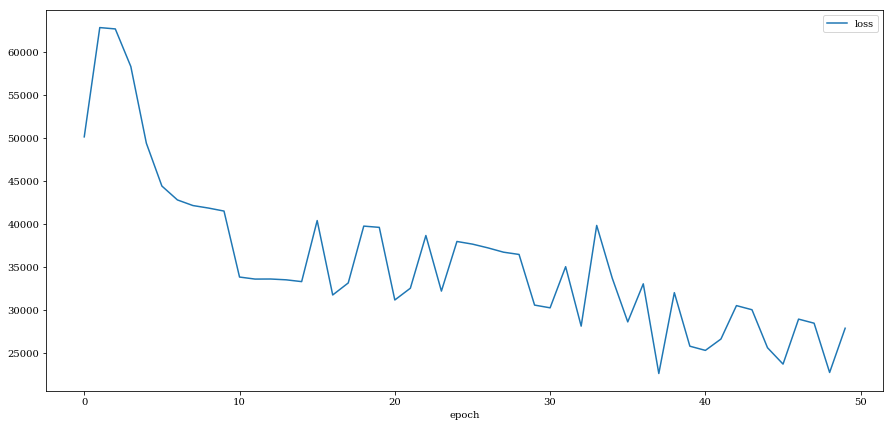

In [612]:
lossesDF = pandas.DataFrame({'loss' : losses, 'epoch' : range(len(losses))})
lossesDF.plot(y = 'loss', x = 'epoch', logy=False, figsize=(15, 7))
plt.show()

#### Dimensions

In [935]:
numWords = 150
targetWords = poemW2V_1_loss.wv.index2word[:numWords]

In [936]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(poemW2V_1_loss[word])
wordsSubMatrix = numpy.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.34022552,  0.42485765, -0.3323249 , ...,  0.3917794 ,
        -0.8199462 ,  0.27364913],
       [ 0.9158409 ,  0.8883059 , -0.02351522, ..., -0.7561295 ,
         0.21246764, -0.8107179 ],
       [ 0.03280354, -0.2520353 , -1.2020999 , ..., -0.2433817 ,
         1.2818589 , -0.6624158 ],
       ...,
       [ 0.52586824,  0.45485663, -0.08310228, ...,  0.31459478,
         0.07579173, -0.8994535 ],
       [ 0.37577555,  0.6400065 ,  0.24485005, ..., -0.09660162,
         1.2566383 , -0.8919188 ],
       [ 1.0595609 , -1.0400529 ,  1.1943412 , ..., -0.9764416 ,
         1.3034556 ,  0.6043665 ]], dtype=float32)

In [937]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

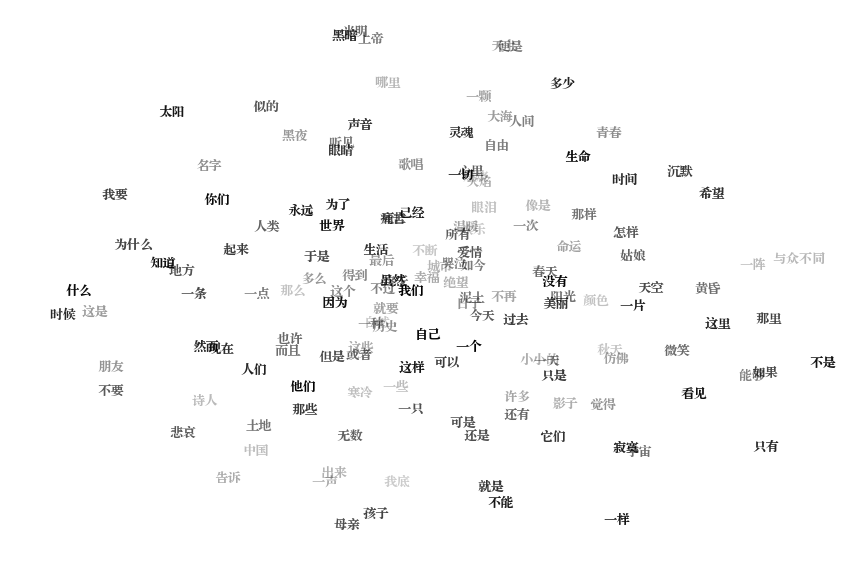

In [938]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  2000 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2,
                fontproperties = ChineseFont1)
plt.xticks(())
plt.yticks(())
plt.show()

Create my own word lists which contains three dimensions and most common symbols

In [574]:
#words to create dimensions
poemTargetWords = ['生命','希望','胜利','光明','死亡','绝望','失败','黑暗','快乐','幸福','笑容','欢乐','悲伤','痛苦','眼泪','忧伤','祖国','中国','母亲','东方','世界','远方','陌生','流浪']
#words we will be mapping
poemTargetWords += ["太阳","土地","大地","泥土","阳光","天空","月光","眼睛","黑夜","春天","秋天","冬天","火焰","影子","原野","女人","大海","花朵"]


wordsSubMatrix = []
for word in poemTargetWords:
    wordsSubMatrix.append(poemW2V_1_loss[word])
wordsSubMatrix = numpy.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.09884122,  0.7704531 , -1.6983192 , ..., -0.39878115,
        -0.5169031 ,  0.47223482],
       [ 3.5524411 ,  1.5251542 ,  0.892598  , ..., -0.00485885,
         1.2351255 , -0.6460901 ],
       [ 1.7720116 ,  0.60414684, -0.466351  , ...,  0.05197551,
         0.17632855,  0.40144643],
       ...,
       [-0.04919773, -0.62670565,  0.20233805, ..., -1.1536016 ,
        -0.85556936, -0.5726596 ],
       [ 0.13519609, -0.86580276,  0.16840875, ...,  1.4314605 ,
         0.8617711 , -0.85672504],
       [-0.00445641, -0.3936177 ,  0.03884997, ...,  0.17683908,
         0.3431242 , -0.528513  ]], dtype=float32)

In [575]:
pcaWordsPoem1 = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_poem1 = pcaWordsPoem1.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsPoem1 = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_poem1)

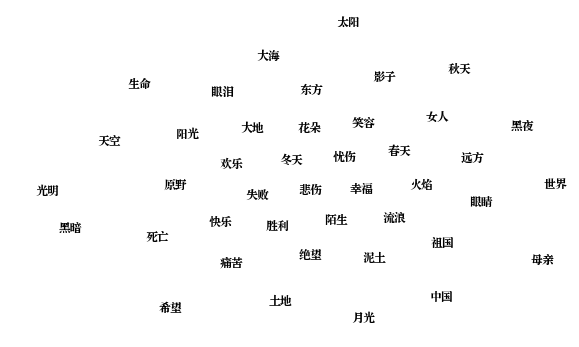

In [576]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsPoem1[:, 0], tsneWordsPoem1[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(poemTargetWords):
    ax.annotate(word, (tsneWordsPoem1[:, 0][i],tsneWordsPoem1[:, 1][i]), size =  500 * (len(poemTargetWords) - i) / len(poemTargetWords),fontproperties = ChineseFont1)
plt.xticks(())
plt.yticks(())
plt.show()

In [577]:
def normalize(vector):
    normalized_vector = vector / numpy.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Create three dimensions: hope, hapiness and nationalism

In [578]:
Hopeness = dimension(poemW2V_1_loss,['生命','希望','胜利','光明'], ['死亡','绝望','失败','黑暗'])
Sentiments = dimension(poemW2V_1_loss,['快乐','幸福','笑容','欢乐'],['悲伤','痛苦','眼泪','忧伤'])
Nationalism = dimension(poemW2V_1_loss,['祖国','中国','母亲','东方'],['世界','远方','陌生','流浪'])

Create a list contains all the common symbols

In [579]:
symbols = ["太阳","土地","大地","泥土","阳光","天空","月光","眼睛","黑夜","春天","秋天","冬天","火焰","影子","原野","女人","花朵"]

In [580]:
def makeDF(model, word_list):
    h = []
    s = []
    n = []
    for word in word_list:
        h.append(sklearn.metrics.pairwise.cosine_similarity(poemW2V_1_loss[word].reshape(1,-1), Hopeness.reshape(1,-1))[0][0])
        s.append(sklearn.metrics.pairwise.cosine_similarity(poemW2V_1_loss[word].reshape(1,-1), Sentiments.reshape(1,-1))[0][0])
        n.append(sklearn.metrics.pairwise.cosine_similarity(poemW2V_1_loss[word].reshape(1,-1), Nationalism.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'hopeness': h, 'sentiments': s, 'nationalism': n}, index = word_list)
    return df

In [581]:
SymbolDf1 = makeDF(poemW2V_1_loss, symbols) 

In [582]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12,fontproperties=ChineseFont1)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

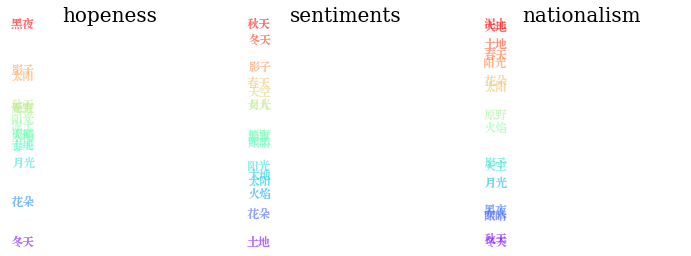

In [585]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, SymbolDf1, 'hopeness')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, SymbolDf1, 'sentiments')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, SymbolDf1, 'nationalism')
plt.savefig("dimension1.png")
plt.show()

#### Cosine Similarity

Look into the words most similar to sun

In [613]:
poemW2V_1_loss.most_similar('太阳')

[('刚刚', 0.7760164737701416),
 ('上升', 0.7217562794685364),
 ('沉醉', 0.6970336437225342),
 ('家乡', 0.6869908571243286),
 ('鲜红', 0.6524267792701721),
 ('山峰', 0.6358749270439148),
 ('出现', 0.618114709854126),
 ('混合', 0.613161027431488),
 ('回家', 0.6126440167427063),
 ('全部', 0.6105204820632935)]

In [614]:
poemW2V_1_loss.most_similar(positive=['光明', '太阳'], negative = ['死亡'])

[('出去', 0.6707677841186523),
 ('水晶', 0.669512152671814),
 ('鲜明', 0.6460118889808655),
 ('乌云', 0.6264572143554688),
 ('照耀', 0.6102257966995239),
 ('一枝', 0.6082742214202881),
 ('蔷薇', 0.5985002517700195),
 ('出现', 0.5961692929267883),
 ('荒野', 0.5913752317428589),
 ('刚刚', 0.5867778658866882)]

Define a function to calculate the cosine similarity between two words

In [46]:
def cos_difference(embedding,word1,word2):
    return sklearn.metrics.pairwise.cosine_similarity(embedding[word1].reshape(1,-1),embedding[word2].reshape(1,-1))

Look into the similarity between sun and words that represent three dimensions respectively

In [615]:
cos_difference(poemW2V_1_loss, '太阳','光明')

array([[0.23833673]], dtype=float32)

In [616]:
cos_difference(poemW2V_1_loss, '太阳','希望')

array([[0.09103657]], dtype=float32)

In [617]:
cos_difference(poemW2V_1_loss, '太阳','生命')

array([[0.2610836]], dtype=float32)

In [618]:
cos_difference(poemW2V_1_loss, '太阳','白昼')

array([[0.34103078]], dtype=float32)

In [619]:
cos_difference(poemW2V_1_loss, '太阳','胜利')

array([[0.12674089]], dtype=float32)

In [620]:
cos_difference(poemW2V_1_loss, '太阳','祖国')

array([[-0.14449693]], dtype=float32)

In [621]:
cos_difference(poemW2V_1_loss, '太阳','中国')

array([[0.09428129]], dtype=float32)

In [622]:
cos_difference(poemW2V_1_loss, '太阳','母亲')

array([[0.2281993]], dtype=float32)

In [623]:
cos_difference(poemW2V_1_loss, '太阳','东方')

array([[0.4466233]], dtype=float32)

In [624]:
cos_difference(poemW2V_1_loss, '太阳','故乡')

array([[-0.14253934]], dtype=float32)

In [625]:
cos_difference(poemW2V_1_loss, '太阳','家乡')

array([[0.686991]], dtype=float32)

In [626]:
cos_difference(poemW2V_1_loss, '太阳','欢乐')

array([[0.01206951]], dtype=float32)

In [627]:
cos_difference(poemW2V_1_loss, '太阳','幸福')

array([[0.18785053]], dtype=float32)

In [628]:
cos_difference(poemW2V_1_loss, '太阳','笑容')

array([[0.0733963]], dtype=float32)

In [629]:
cos_difference(poemW2V_1_loss, '太阳','快乐')

array([[0.07759334]], dtype=float32)

Look into the similarity between three dimensions

In [695]:
cos_difference(poemW2V_1_loss, '母亲','笑容')

array([[0.05296108]], dtype=float32)

Boot strapping to calculate the confidence intervals

In [1244]:
estimatesB=[]
for x in range(20):
    poemW2V_1B = gensim.models.word2vec.Word2Vec(TokensLst1)
    try:
        estimatesB.append(cos_difference(poemW2V_1B, '太阳', '家乡')[0,0])
    except KeyError:
        #Missing one of the words from the vocab
        pass
                                                      
estimatesB.sort()         
estimatesB

[0.9994819,
 0.9994956,
 0.9995048,
 0.9995053,
 0.99950564,
 0.9995058,
 0.9995078,
 0.99951136,
 0.99951196,
 0.99951255,
 0.9995147,
 0.9995148,
 0.9995174,
 0.9995183,
 0.9995204,
 0.99952084,
 0.9995427,
 0.9995705,
 0.9995775,
 0.99958134]

In [1240]:
print("The 90% confidence interval for the cosine distance between 太阳 and 家乡 is:\n",estimatesB[1], estimatesB[-2])

The 90% confidence interval for the cosine distance between 太阳 and 生命 is:
 -0.05469598 -0.04568917


### 1950-1970

#### Train the model

In [589]:
poemW2V_2 = gensim.models.word2vec.Word2Vec(TokensLst2)

In [590]:
poemW2V_2_loss = gensim.models.word2vec.Word2Vec(size = 100, #dimensions
                                                      alpha=0.025,
                                                      window=3,
                                                      min_count=5,
                                                      hs=0,  #hierarchical softmax toggle
                                                      compute_loss = True,
                                                     )
poemW2V_2_loss.build_vocab(TokensLst2)
poemW2V_2_loss.train(TokensLst2, 
                     total_examples=poemW2V_2.corpus_count, 
                     epochs=1, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )
#Using a list so we can capture every epoch
losses = [poemW2V_2_loss.running_training_loss]
losses[0]

74198.921875

In [591]:
for i in range(19):
    poemW2V_2_loss.train(TokensLst1, 
                     total_examples=poemW2V_2.corpus_count, 
                     epochs=1,
                             )
    losses.append(poemW2V_2_loss.running_training_loss)
    print("Done epoch {}".format(i + 2), end = '\r')

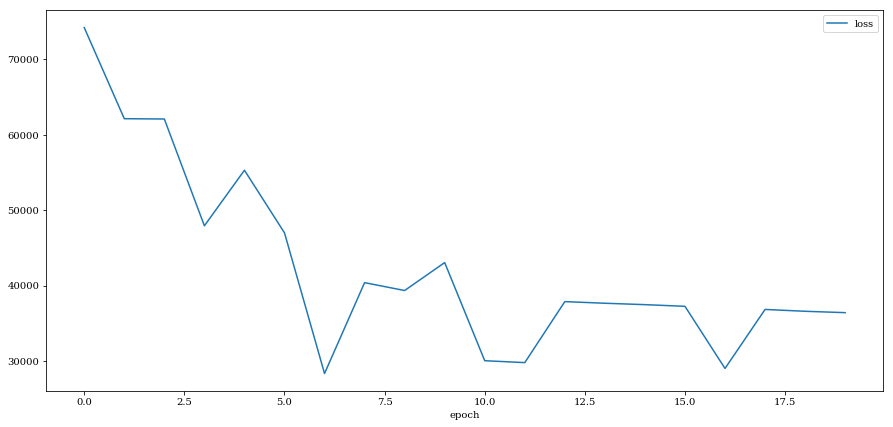

In [592]:
lossesDF = pandas.DataFrame({'loss' : losses, 'epoch' : range(len(losses))})
lossesDF.plot(y = 'loss', x = 'epoch', logy=False, figsize=(15, 7))
plt.show()

#### Dimensions

In [593]:
numWords = 150
targetWords = poemW2V_2_loss.wv.index2word[:numWords]

In [594]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(poemW2V_2_loss[word])
wordsSubMatrix = numpy.array(wordsSubMatrix)
wordsSubMatrix

array([[ 1.3799137 ,  0.07675575, -0.7109858 , ..., -0.2584074 ,
        -0.7472354 , -0.64664674],
       [ 0.67805165, -0.4519169 ,  0.1453947 , ..., -0.4189732 ,
        -0.25128394, -0.7368177 ],
       [ 0.9713134 , -0.20719016, -0.44044405, ..., -0.38101166,
        -0.2279334 , -1.0784756 ],
       ...,
       [ 0.8387824 , -0.3466052 , -0.32340735, ..., -0.49485934,
        -0.08205823, -1.311708  ],
       [ 0.59628695, -0.48297796, -0.07289267, ..., -0.38375393,
        -0.07169575, -1.0076228 ],
       [ 0.74955434, -0.35090116, -0.20973225, ..., -0.43420514,
        -0.1494328 , -0.8008686 ]], dtype=float32)

In [595]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

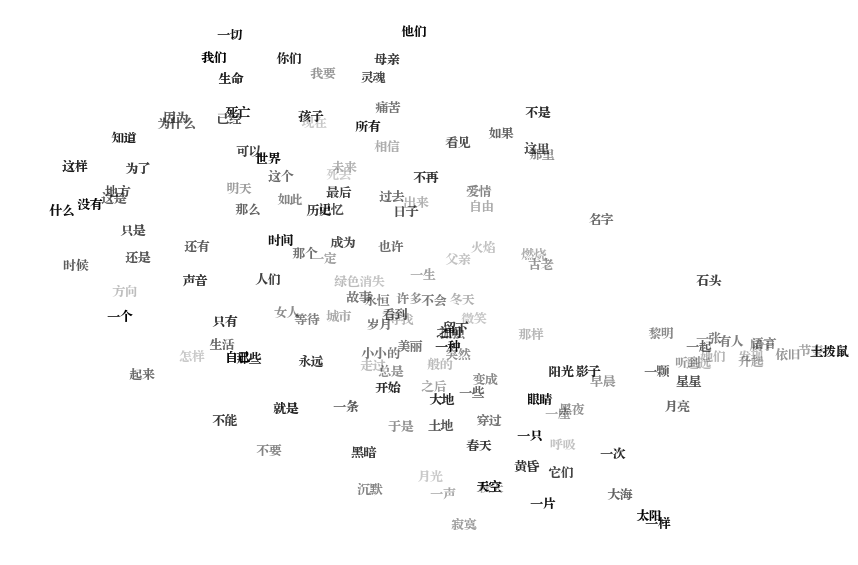

In [596]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  2000 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2,
                fontproperties = ChineseFont1)
plt.xticks(())
plt.yticks(())
plt.show()

Create my own word list for corpus 2

In [921]:
#words to create dimensions
poemTargetWords = ['生命','希望','胜利','光明','死亡','绝望','失败','黑暗','快乐','幸福','笑容','欢乐','悲伤','痛苦','眼泪','忧伤','祖国','中国','母亲','东方','世界','远方','陌生','流浪']
#words we will be mapping
poemTargetWords += ["太阳","土地","大地","泥土","阳光","天空","月光","眼睛","黑夜","春天","秋天","冬天","火焰","影子","原野","女人","大海","花朵"]


wordsSubMatrix = []
for word in poemTargetWords:
    wordsSubMatrix.append(poemW2V_2_loss[word])
wordsSubMatrix = numpy.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.7991191 , -0.03956974, -0.42109424, ..., -0.29389882,
        -0.50909054, -0.20511472],
       [ 1.282727  , -0.11201426, -0.27845424, ..., -0.23556468,
        -0.19332556, -0.6009291 ],
       [ 0.8860952 , -0.36144435, -0.2565889 , ..., -0.40888235,
        -0.19502345, -0.8060925 ],
       ...,
       [ 0.59047586, -0.36182073, -0.14485866, ..., -0.46197575,
        -0.13314955, -0.81612355],
       [ 0.48193145, -0.59339386, -0.09143441, ..., -0.100536  ,
         0.12826528, -0.6567253 ],
       [ 0.5407239 , -0.41016555, -0.09527975, ..., -0.31976467,
        -0.053171  , -0.7964212 ]], dtype=float32)

In [922]:
pcaWordsPoem2 = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_poem2 = pcaWordsPoem2.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsPoem2 = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_poem2)

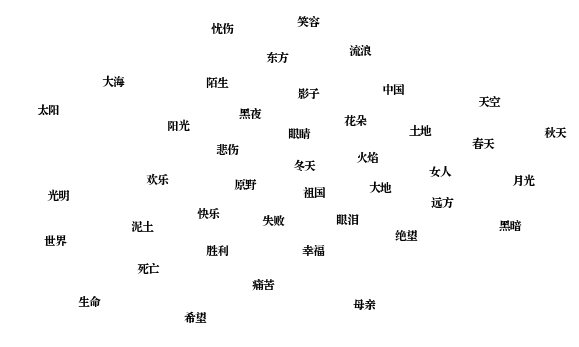

In [923]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsPoem2[:, 0], tsneWordsPoem2[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(poemTargetWords):
    ax.annotate(word, (tsneWordsPoem2[:, 0][i],tsneWordsPoem2[:, 1][i]), size =  500 * (len(poemTargetWords) - i) / len(poemTargetWords),fontproperties = ChineseFont1)
plt.xticks(())
plt.yticks(())
plt.show()

Create dimensions

In [924]:
Hopeness = dimension(poemW2V_2_loss,['生命','希望','胜利','光明'], ['死亡','绝望','失败','黑暗'])
Sentiments = dimension(poemW2V_2_loss,['快乐','幸福','笑容','欢乐'],['悲伤','痛苦','眼泪','忧伤'])
Nationalism = dimension(poemW2V_2_loss,['祖国','中国','母亲','东方'],['世界','远方','陌生','流浪'])

In [925]:
SymbolDf2 = makeDF(poemW2V_2_loss, symbols) 

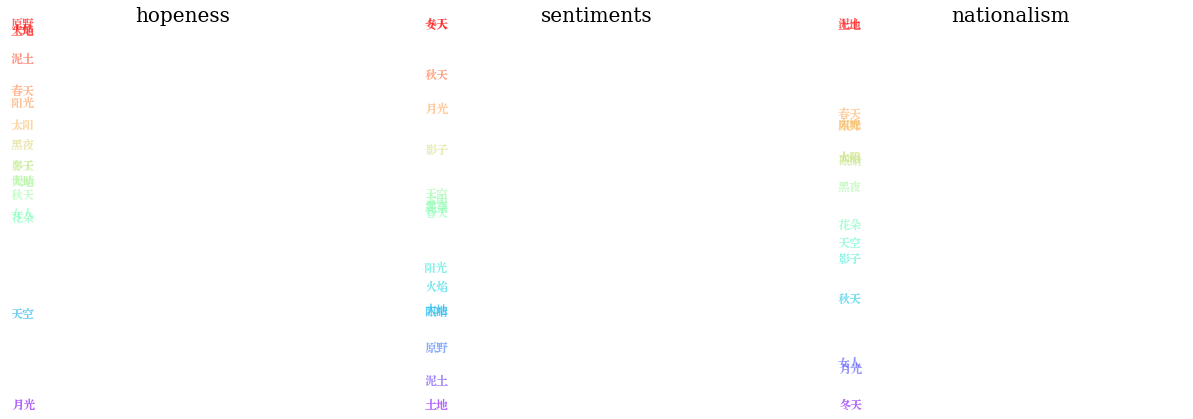

In [927]:
fig = plt.figure(figsize = (21,7))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, SymbolDf2, 'hopeness')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, SymbolDf2, 'sentiments')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, SymbolDf2, 'nationalism')
plt.savefig("dimension2")
plt.show()

#### Cosine Similarity

Most similar words to sun

In [976]:
poemW2V_2_loss.most_similar('太阳')

[('一样', 0.9573988318443298),
 ('可疑', 0.9510008096694946),
 ('浸透', 0.9341525435447693),
 ('侵袭', 0.923177182674408),
 ('平息', 0.9159154891967773),
 ('中午', 0.911955714225769),
 ('烟雨', 0.9069346189498901),
 ('行进', 0.904167115688324),
 ('臀部', 0.9032670259475708),
 ('沼泽', 0.897951602935791)]

Look into the cosine similarities of words that represents the dimension of hope / nationalism / happiness.

In [631]:
cos_difference(poemW2V_2_loss, '太阳', '光明')

array([[0.5043665]], dtype=float32)

In [632]:
cos_difference(poemW2V_2_loss, '太阳', '希望')

array([[0.60812914]], dtype=float32)

In [633]:
cos_difference(poemW2V_2_loss, '太阳', '生命')

array([[0.6471455]], dtype=float32)

In [634]:
cos_difference(poemW2V_2_loss, '太阳', '胜利')

array([[0.63064265]], dtype=float32)

In [635]:
cos_difference(poemW2V_2_loss, '太阳', '祖国')

array([[0.5918168]], dtype=float32)

In [636]:
cos_difference(poemW2V_2_loss, '太阳', '中国')

array([[0.6804148]], dtype=float32)

In [637]:
cos_difference(poemW2V_2_loss, '太阳', '东方')

array([[0.7326073]], dtype=float32)

In [638]:
cos_difference(poemW2V_2_loss, '太阳', '母亲')

array([[0.55615425]], dtype=float32)

In [639]:
cos_difference(poemW2V_2_loss, '太阳', '家乡')

array([[0.8255949]], dtype=float32)

In [640]:
cos_difference(poemW2V_2_loss, '太阳', '故乡')

array([[0.69237363]], dtype=float32)

In [641]:
cos_difference(poemW2V_2_loss, '太阳', '快乐')

array([[0.6183481]], dtype=float32)

In [642]:
cos_difference(poemW2V_2_loss, '太阳', '幸福')

array([[0.5863837]], dtype=float32)

In [643]:
cos_difference(poemW2V_2_loss, '太阳', '笑容')

array([[0.5992747]], dtype=float32)

In [644]:
cos_difference(poemW2V_2_loss, '太阳', '欢乐')

array([[0.59716785]], dtype=float32)

Look into the cosine similarities among three dimensions

In [777]:
cos_difference(poemW2V_2_loss, '母亲', '笑容')

array([[0.76032376]], dtype=float32)

In [1245]:
estimatesB=[]
for x in range(20):
    poemW2V_2B = gensim.models.word2vec.Word2Vec(TokensLst2)
    try:
        estimatesB.append(cos_difference(poemW2V_2B, '太阳', '家乡')[0,0])
    except KeyError:
        #Missing one of the words from the vocab
        pass
                                                      
estimatesB.sort()         
estimatesB

[0.9988041,
 0.9989193,
 0.9989702,
 0.99899495,
 0.99899673,
 0.99900544,
 0.9990066,
 0.9990072,
 0.9990447,
 0.99906945,
 0.9990727,
 0.9990733,
 0.9990758,
 0.999076,
 0.9990774,
 0.9990806,
 0.9990833,
 0.9990971,
 0.9991284,
 0.9991566]

In [132]:
print("The 90% confidence interval for the cosine distance between 太阳 and 生命 is:\n",estimatesB[1], estimatesB[-2])

The 90% confidence interval for the cosine distance between 太阳 and 生命 is:
 0.8603209 0.8603209


### After 1980

#### Train the model

In [335]:
poemW2V_3 = gensim.models.word2vec.Word2Vec(TokensLst3)

In [336]:
poemW2V_3_loss = gensim.models.word2vec.Word2Vec(size = 100, #dimensions
                                                      alpha=0.025,
                                                      window=5,
                                                      min_count=5,
                                                      hs=0,  #hierarchical softmax toggle
                                                      compute_loss = True,
                                                     )
poemW2V_3_loss.build_vocab(TokensLst3)
poemW2V_3_loss.train(TokensLst3, 
                     total_examples=poemW2V_3.corpus_count, 
                     epochs=1, #This the running_training_loss is a total so we have to do 1 epoch at a time
                    )
#Using a list so we can capture every epoch
losses = [poemW2V_3_loss.running_training_loss]
losses[0]

458520.5

In [337]:
for i in range(19):
    poemW2V_3_loss.train(TokensLst3, 
                     total_examples=poemW2V_3.corpus_count, 
                     epochs=1,
                             )
    losses.append(poemW2V_3_loss.running_training_loss)
    print("Done epoch {}".format(i + 2), end = '\r')

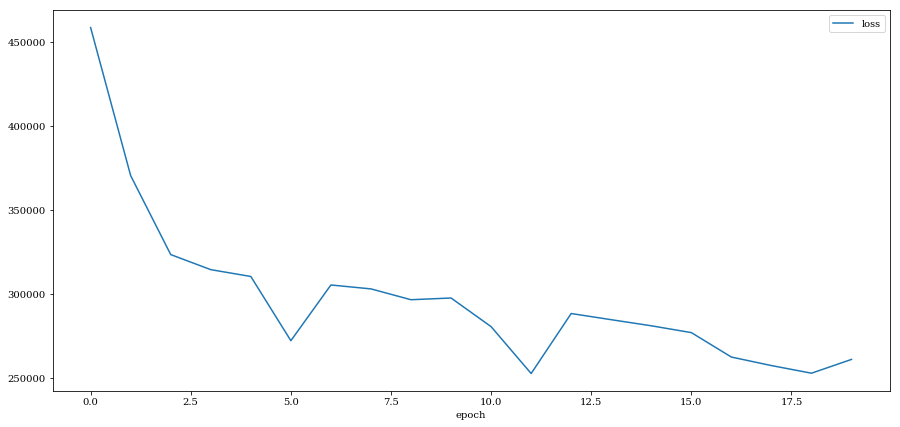

In [338]:
lossesDF = pandas.DataFrame({'loss' : losses, 'epoch' : range(len(losses))})
lossesDF.plot(y = 'loss', x = 'epoch', logy=False, figsize=(15, 7))
plt.show()

#### Dimensions

In [340]:
numWords = 150
targetWords = poemW2V_3_loss.wv.index2word[:numWords]

In [341]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(poemW2V_3_loss[word])
wordsSubMatrix = numpy.array(wordsSubMatrix)
wordsSubMatrix

array([[ 1.9197456 ,  0.43159884, -0.05648958, ..., -0.07788899,
         0.35391176, -2.4212716 ],
       [ 0.7716925 ,  0.35908335, -0.57587093, ..., -0.83298045,
        -3.2947793 , -0.9001444 ],
       [ 1.9123693 , -1.75975   , -2.0945718 , ..., -1.0715764 ,
         0.83312273, -0.49656737],
       ...,
       [ 0.46000275, -3.5528657 , -0.3992673 , ..., -0.21665084,
        -0.52807266,  2.0260284 ],
       [ 0.8184235 ,  2.0458055 , -0.7485537 , ..., -1.2205434 ,
        -0.06737988, -1.1912634 ],
       [ 0.6651359 , -0.9242643 , -1.7076565 , ..., -1.6923877 ,
        -0.8156497 , -0.23448977]], dtype=float32)

In [342]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

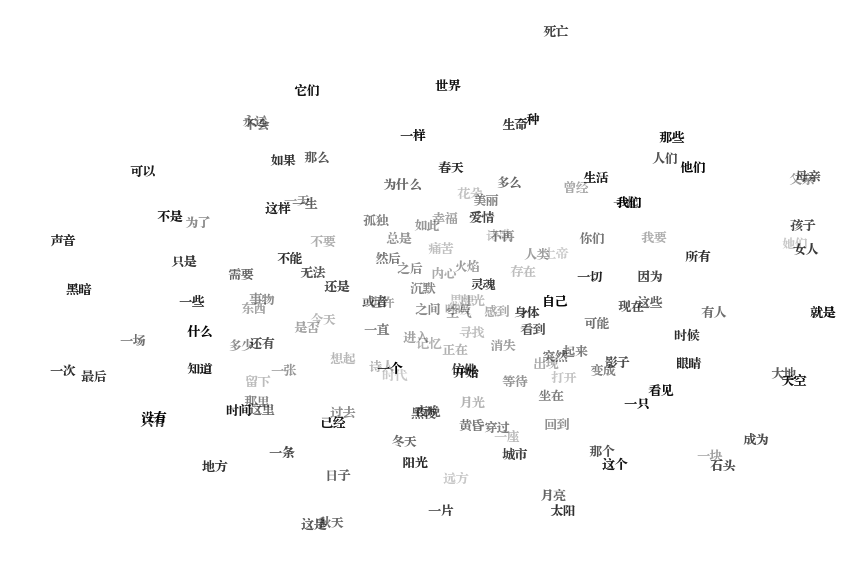

In [343]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  2000 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2,
                fontproperties = ChineseFont1)
plt.xticks(())
plt.yticks(())
plt.show()

Create my own list for corpus 3

In [929]:
#words to create dimensions
poemTargetWords = ['生命','希望','胜利','光明','死亡','绝望','失败','黑暗','快乐','幸福','笑容','欢乐','悲伤','痛苦','眼泪','忧伤','祖国','中国','母亲','东方','世界','远方','陌生','流浪']
#words we will be mapping
poemTargetWords += ["太阳","土地","大地","泥土","阳光","天空","月光","眼睛","黑夜","春天","火焰","影子","原野","女人","大海","花朵"]


wordsSubMatrix = []
for word in poemTargetWords:
    wordsSubMatrix.append(poemW2V_3_loss[word])
wordsSubMatrix = numpy.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.22840032, -0.17370373, -1.6473163 , ...,  0.13217801,
        -0.16864744,  0.15039697],
       [ 0.44201824, -0.00465588, -1.05117   , ..., -0.01740137,
        -0.2382857 , -0.0910318 ],
       [ 0.1847807 , -0.09380363,  0.00768323, ..., -0.14859657,
        -0.23838055, -0.52511513],
       ...,
       [ 1.3447206 , -0.0799184 ,  0.11184489, ..., -1.634291  ,
         0.6620019 , -0.816113  ],
       [-0.31087232, -2.1897705 ,  0.9451494 , ..., -1.4367415 ,
        -0.08620232, -0.97333527],
       [ 0.3580501 , -1.2152243 , -0.885693  , ...,  0.322965  ,
        -0.578892  , -0.49017945]], dtype=float32)

In [930]:
pcaWordsPoem3 = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_poem3 = pcaWordsPoem3.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsPoem3 = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_poem3)

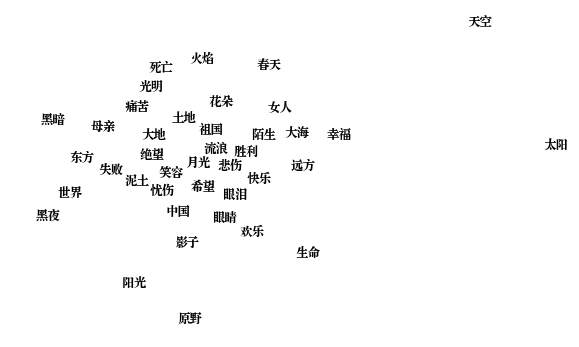

In [931]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsPoem3[:, 0], tsneWordsPoem3[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(poemTargetWords):
    ax.annotate(word, (tsneWordsPoem3[:, 0][i],tsneWordsPoem3[:, 1][i]), size =  500 * (len(poemTargetWords) - i) / len(poemTargetWords),fontproperties = ChineseFont1)
plt.xticks(())
plt.yticks(())
plt.show()

Create dimensions

In [932]:
Hopeness = dimension(poemW2V_3_loss,['生命','希望','胜利','光明'], ['死亡','绝望','失败','黑暗'])
Sentiments = dimension(poemW2V_3_loss,['快乐','幸福','笑容','欢乐'],['悲伤','痛苦','眼泪','忧伤'])
Nationalism = dimension(poemW2V_3_loss,['祖国','中国','母亲','东方'],['世界','远方','陌生','流浪'])

In [933]:
SymbolDf3 = makeDF(poemW2V_3_loss, symbols) 

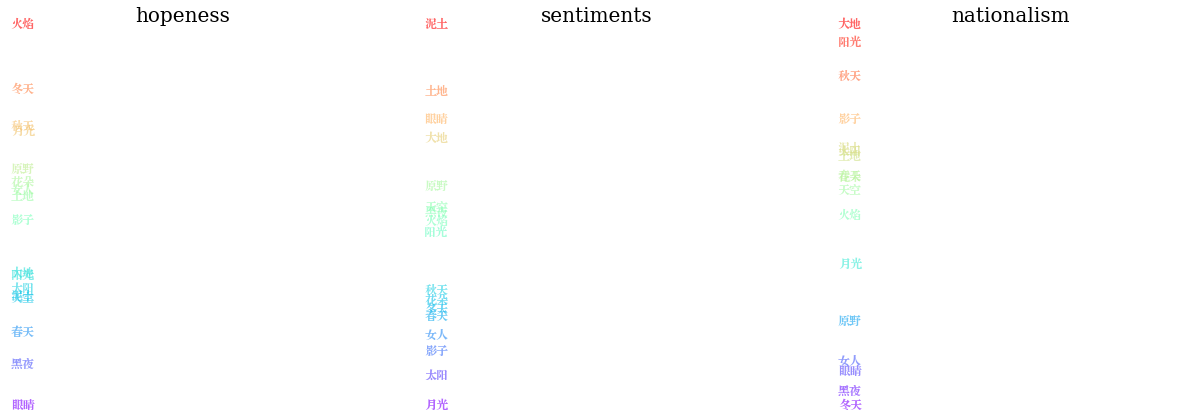

In [934]:
fig = plt.figure(figsize = (21,7))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, SymbolDf3, 'hopeness')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, SymbolDf3, 'sentiments')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, SymbolDf3, 'nationalism')
plt.savefig("dimension3")
plt.show()

#### Cosine similarity

Most similar words to sun

In [339]:
poemW2V_3_loss.most_similar('太阳')

[('落山', 0.7489849328994751),
 ('升起', 0.7020647525787354),
 ('赤道', 0.6764454245567322),
 ('照耀', 0.6619211435317993),
 ('忍受着', 0.6047632694244385),
 ('月亮', 0.5960375666618347),
 ('斩断', 0.5791630148887634),
 ('升入', 0.5691344738006592),
 ('头上', 0.5659858584403992),
 ('站成', 0.5646634101867676)]

Look into the cosine similarities of words that represents the dimension of hope / nationalism / happiness.

In [350]:
cos_difference(poemW2V_3_loss, '太阳', '光明')

array([[0.45346412]], dtype=float32)

In [351]:
cos_difference(poemW2V_3_loss, '太阳', '希望')

array([[0.12340562]], dtype=float32)

In [352]:
cos_difference(poemW2V_3_loss, '太阳', '生命')

array([[0.05312784]], dtype=float32)

In [353]:
cos_difference(poemW2V_3_loss, '太阳', '胜利')

array([[0.12902349]], dtype=float32)

In [354]:
cos_difference(poemW2V_3_loss, '太阳', '祖国')

array([[0.14816181]], dtype=float32)

In [355]:
cos_difference(poemW2V_3_loss, '太阳', '中国')

array([[0.12649384]], dtype=float32)

In [356]:
cos_difference(poemW2V_3_loss, '太阳', '东方')

array([[0.5307255]], dtype=float32)

In [357]:
cos_difference(poemW2V_3_loss, '太阳', '母亲')

array([[-0.02736412]], dtype=float32)

In [358]:
cos_difference(poemW2V_3_loss, '太阳', '家乡')

array([[0.17760119]], dtype=float32)

In [359]:
cos_difference(poemW2V_3_loss, '太阳', '故乡')

array([[0.20052323]], dtype=float32)

In [360]:
cos_difference(poemW2V_3_loss, '太阳', '快乐')

array([[-0.19731799]], dtype=float32)

In [361]:
cos_difference(poemW2V_3_loss, '太阳', '幸福')

array([[-0.05226234]], dtype=float32)

In [362]:
cos_difference(poemW2V_3_loss, '太阳', '笑容')

array([[-0.00406199]], dtype=float32)

In [645]:
cos_difference(poemW2V_3_loss, '太阳', '欢乐')

array([[-0.0094941]], dtype=float32)

Look into the cosine similarities among three dimensions

In [829]:
cos_difference(poemW2V_3_loss, '母亲', '欢乐')

array([[0.09360821]], dtype=float32)

In [1246]:
estimatesB=[]
for x in range(20):
    poemW2V_3B = gensim.models.word2vec.Word2Vec(TokensLst3)
    try:
        estimatesB.append(cos_difference(poemW2V_3B, '太阳', '家乡')[0,0])
    except KeyError:
        #Missing one of the words from the vocab
        pass
                                                      
estimatesB.sort()         
estimatesB

[0.9986666,
 0.9986932,
 0.99871427,
 0.9987274,
 0.99873847,
 0.99874675,
 0.9987586,
 0.9987807,
 0.998784,
 0.99884665,
 0.9988513,
 0.99885327,
 0.99886805,
 0.99886894,
 0.9988696,
 0.99888676,
 0.9989124,
 0.99893844,
 0.998949,
 0.99902976]

In [1247]:
print("The 90% confidence interval for the cosine distance between 太阳 and 生命 is:\n",estimatesB[1], estimatesB[-2])

The 90% confidence interval for the cosine distance between 太阳 and 生命 is:
 0.9986932 0.998949


#### Heatmap

Before 1950: The cosine similarities among sun, hope, nationalism, and happiness

In [715]:
fileids = ['sun','hope','nationalism','happiness']

In [716]:
M1 = numpy.genfromtxt("../data/poem-dimenMatrix-1.csv",delimiter=',')

In [717]:
M1

array([[1.    , 0.175 , 0.1525, 0.11  ],
       [0.175 , 1.    , 0.141 , 0.1793],
       [0.1525, 0.141 , 1.    , 0.08  ],
       [0.11  , 0.1793, 0.08  , 1.    ]])

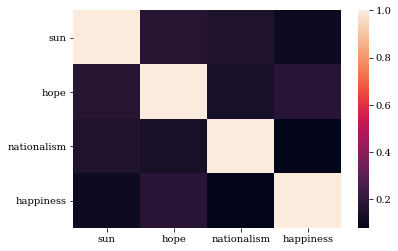

In [840]:
fig = plt.figure()
cos_sim = pandas.DataFrame(M1, columns = fileids, index = fileids)
ax = sns.heatmap(cos_sim)
plt.savefig("heatmap1")
plt.show()

In [838]:
import pickle #if you want to save layouts

**1950-1970**: The cosine similarities among sun, hope, nationalism, and happiness

In [778]:
M2 = numpy.genfromtxt("../data/poem-dimenMatrix-2.csv",delimiter=',')

In [779]:
M2

array([[1.    , 0.5925, 0.6375, 0.5925],
       [0.5925, 1.    , 0.8175, 0.8731],
       [0.6375, 0.8175, 1.    , 0.9193],
       [0.5925, 0.8731, 0.9193, 1.    ]])

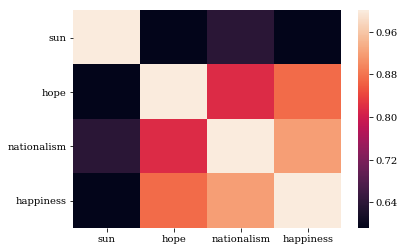

In [841]:
fig = plt.figure()
cos_sim = pandas.DataFrame(M2, columns = fileids, index = fileids)
ax = sns.heatmap(cos_sim)
plt.savefig("heatmap2")
plt.show()

**After 1980**: The cosine similarities among sun, hope, nationalism, and happiness

In [833]:
M3 = numpy.genfromtxt("../data/poem-dimenMatrix-3.csv",delimiter=',')

In [834]:
M3

array([[ 1.    ,  0.185 ,  0.1925, -0.07  ],
       [ 0.185 ,  1.    ,  0.1637,  0.2405],
       [ 0.1925,  0.1637,  1.    ,  0.1106],
       [-0.07  ,  0.2405,  0.1106,  1.    ]])

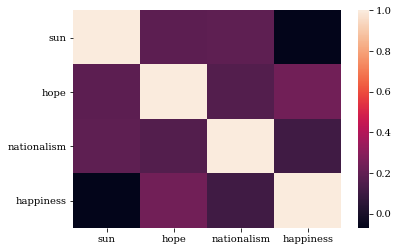

In [842]:
fig = plt.figure()
cos_sim = pandas.DataFrame(M3, columns = fileids, index = fileids)
ax = sns.heatmap(cos_sim)
plt.savefig("heatmap3")
plt.show()

### Network of SUN

#### Before 1950

In [943]:
import networkx as nx

Define a function for calcutaling word co-occurrence and return in a nx network.

In [947]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    #for sent in sentences:
        
    words |= set(sentences)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = numpy.zeros((len(wordIndices), len(wordIndices)))
    
    for i, word1 in enumerate(sentences):
        word1Index = wordIndices[word1]
        for word2 in sentences[i + 1:]:
            coOcMat[word1Index][wordIndices[word2]] += 1
    
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

##### The network of center words

In [969]:
g1 = wordCooccurrence(poem_1['jieba_tokenized'][:100].sum())

In [970]:
len(g1)

3944

In [971]:
gg1 = g1.copy()

Remove the edges with a weight less than 1250.

In [1007]:
g1.remove_edges_from([(n1, n2) for n1, n2, d in g1.edges(data = True) if d['weight'] <= 1250])
g1.remove_nodes_from(list(nx.isolates(g1))) #since we are changing the graph list() evaluates the isolates first
giant_1 = max(nx.connected_component_subgraphs(g1), key=len) # keep just the giant connected component
print(nx.info(giant_1))

Name: 
Type: Graph
Number of nodes: 60
Number of edges: 107
Average degree:   3.5667


In [966]:
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
#from ggplot import *
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

import sys
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

from matplotlib.font_manager import FontProperties
ChineseFont1 = FontProperties(fname = "/Library/Fonts/Songti.ttc")




def Filter_keepCompNum(G,filter_="betweenness"):
    G_temp = G.copy()
    
    if filter_ =="betweenness":
        index = nx.betweenness_centrality(G) #betweeness centrality score
    elif filter_ =="closeness":
        index = nx.closeness_centrality(G) #closeness centrality score
    elif filter_ == "eigenvector":
        index = nx.eigenvector_centrality(G) #eigenvector centrality score
    else:
        raise ValueError("wrong filter paremeter, should be: betweenness/closeness/eigenvector")
        
    
    Compnum = nx.number_connected_components(G)
    sorted_index = sorted(index.items(), key=lambda x:x[1])
    G_last = G_temp.copy()
    for i in range(len(sorted_index)-1):
        
        G_last.remove_nodes_from([n[0] for n in sorted_index[:len(sorted_index)-i]])
        if not nx.number_connected_components(G_last)==Compnum:
            G_last = G_temp.copy()
        flushPrint("Total number of nodes (after iteration %s) in the graph is %s" % (i+1,len(G_last)))  
    
    #remove low weight edges
    G = G_last.copy()
    w_dis = []
    for n1, n2, d in G.edges(data = True):
        w_dis.append(d['weight'])
    w_dis = np.array(w_dis)
    minWeight = np.percentile(w_dis,25)
    try:
        G.remove_edges_from([(n1,n2) for n1, n2, d in G.edges(data = True) if d['weight'] <= minWeight])
    except:
        print("weight might be missing from one or more edges.")
        raise
    print()
    print ("Low weight edges removed. Total edge: %s" % len(G.edges) )
    
    G = G.copy()
    indx = nx.isolates(G)
    G.remove_nodes_from([idx for idx in indx])
    print ("Total number of nodes(after removing isolated nodes) in the graph is %s" % len(G))
    return G




def TSNE_based_network_plot(G_temp2):

    G_adj_matrix = nx.to_numpy_matrix(G_temp2)
    Colnames = list(G_temp2.nodes)
    G_df =pd.DataFrame(G_adj_matrix,columns=Colnames)
    indx_dic = {}
    for i in range(len(G_df)):
        indx_dic[i] = Colnames[i]
    G_df = G_df.rename(index = indx_dic)
    G_df.head(5)

    tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(G_df.loc[:,G_df.columns].values)

    df_tsne = G_df.loc[:,G_df.columns].copy()
    df_tsne['x-tsne'] = tsne_results[:,0]
    df_tsne['y-tsne'] = tsne_results[:,1]

    MaxW = np.max(np.max(df_tsne[:-2]))
    EGDE_TOTAL = df_tsne[:-2].sum()
    fig = plt.figure(figsize=[15,10])
    for item in df_tsne.itertuples():
        x = item[-2]
        y = item[-1]

        plt.plot(x,y,'o',alpha=0.7,color='blue',markersize=np.min([EGDE_TOTAL[item.Index],25]))
        plt.text(x, y,item.Index,fontsize =np.min([EGDE_TOTAL[item.Index],25]),fontproperties=ChineseFont1)


    for i, node1 in enumerate(df_tsne.columns[:-2]):
        for node2 in df_tsne.columns[i:-2]:
            if not node1==node2:
                if df_tsne.loc[node1,node2]>0:
                    weight = df_tsne.loc[node1,node2]

                    newweight = np.array(weight/float(MaxW))
                    #newweight = newweight**2

                    x1 = df_tsne.loc[node1,'x-tsne']
                    y1 = df_tsne.loc[node1,'y-tsne']
                    x2 = df_tsne.loc[node2,'x-tsne']
                    y2 = df_tsne.loc[node2,'y-tsne']
                    plt.plot([x1,x2],[y1,y2],'b-',linewidth = 6*newweight,alpha = newweight)
    plt.show()

In [967]:
import pandas as pd
import numpy as np

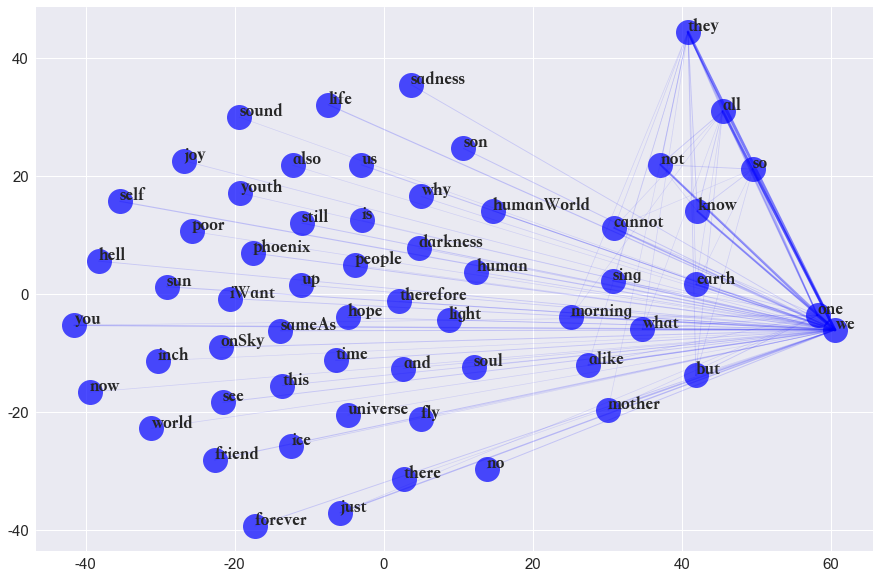

In [1023]:
TSNE_based_network_plot(giant_1_label)

I will relabel the nodes into English, for better visualization.

In [1013]:
print (giant_1.nodes())

['一个', '可怜', '还有', '光明', '人间', '凤凰', '青春', '自己', '永远', '晨安', '一切', '欢喜', '你们', '便是', '敲冰', '人们', '似的', '悲哀', '就是', '他们', '生命', '为什么', '欢唱', '现在', '灵魂', '什么', '还是', '咱们', '起来', '不是', '时候', '希望', '宇宙', '一声', '母亲', '那里', '知道', '看见', '我们', '但是', '地球', '而且', '没有', '我要', '天上', '于是', '然而', '朋友', '一尺', '世界', '孩子', '黑暗', '地狱', '人类', '太阳', '这是', '不能', '一样', '只是', '飞扬']


In [1014]:
# convert the node label into numbers
start = 1
giant_1_num = nx.convert_node_labels_to_integers(giant_1,first_label=start)
print (giant_1_num.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


In [1015]:
# create a dic for labels
mapping = {1: 'one', 2:'poor',3: 'also',4:'light', 5:'humanWorld', 6:'phoenix', 7:'youth', 8:'self', 9:'forever', 10:'morning', 11:'all', 12:'joy', 13:'you', 14:'so', 15:'ice', 16:'people', 17:'alike',18:'sadness', 19:'is', 20:'they', 21:'life', 22:'why', 23:'sing', 24:'now', 25:'soul', 26:'what', 27:'still', 28:'us', 29:'up', 30:'no', 31:'time', 32:'hope', 33:'universe', 34:'sound', 35:'mother', 36:'there', 37:'know', 38:'see', 39:'we', 40:'but', 41:'earth', 42:'and', 43:'not', 44:'iWant', 45:'onSky', 46:'therefore', 47:'but', 48:'friend', 49:'inch', 50:'world', 51:'son', 52:'darkness',53:'hell',54:'human', 55:'sun', 56:'this', 57:'cannot', 58:'sameAs', 59:'just', 60:'fly'}

In [1016]:
giant_1_label = nx.relabel_nodes(giant_1_num, mapping)

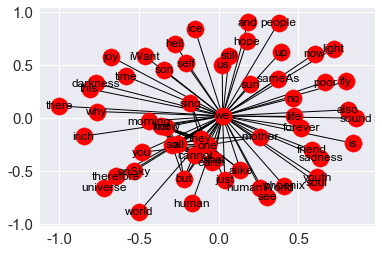

In [1017]:
nx.draw_networkx(giant_1_label)

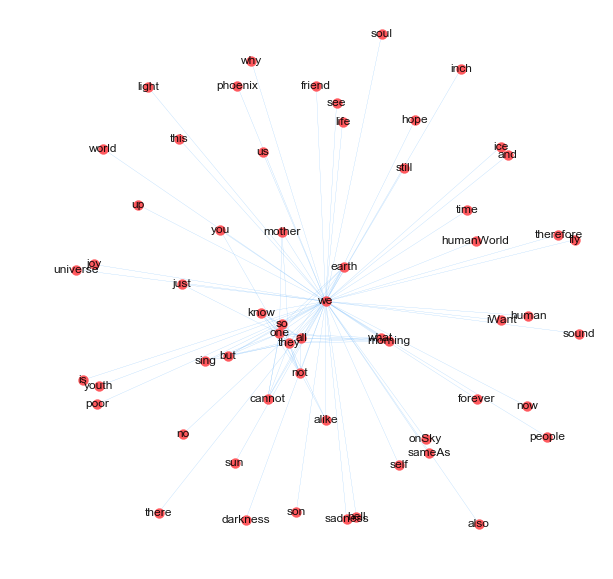

In [1018]:
layout = nx.spring_layout(giant_1_label, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant_1_label, ax = ax, pos = layout, labels = {n:n for n in giant_1_label.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

##### Ego network of "Homeland" (Nouns-Adjectives)

Firstly, we need to POS-tagging the words. To this end, I defined a function to use `jieba` to do POS-Tagging.

In [1025]:
def tokenizePOS(text):
    result_words = []
    if not pandas.isnull(text):
        result = pseg.cut(text)
        for word,tag in result:
            result_words.append((word,tag))
        return result_words
    else:
        return numpy.array([])

In [1026]:
poem_1['jieba_tokens_POS'] = poem_1['poem-text'].apply(lambda x: tokenizePOS(x) )

In [1027]:
poem_1[:10]

,poet-age,poem-name,poem-text,jieba_tokenized,jieba_tokens_POS
poet-name,,,,,
刘大白,2020,秋江的晚上,归巢的鸟儿，\n 尽管是倦了，\n 还驮着斜阳回去。\n\n 双翅一翻，\n 把斜阳...,"[归巢, 鸟儿, 尽管, 斜阳, 回去, 双翅, 一翻, 斜阳, 江上, 头白, 芦苇, 也...","[(归巢, nr), (的, uj), (鸟儿, n), (，, x), (\n, x), ..."
刘大白,2020,旧梦（节选）,五\n\n 最能教人醉的：\n 酒吧，\n 青春吧；\n 但总不如夜深时琉璃也似的月...,"[最能, 教人醉, 酒吧, 青春, 不如, 夜深, 琉璃, 似的, 月色, 心花, 不论, ...","[(五, m), (\n, x), (\n, x), ( , x), ( , x), (最,..."
刘大白,2020,邮吻,我不是不能用指头儿撕，\n 我不是不能用剪刀儿剖，\n 祇是缓缓地\n 轻轻地\n...,"[不是, 不能, 头儿, 不是, 不能, 剪刀, 儿剖, 缓缓, 轻轻地, 仔细, 挑开, ...","[(我, r), (不是, c), (不能, v), (用, p), (指, n), (头儿..."
刘大白,2020,秋夜湖心独坐,被秋光唤起，\n 孤舟独出，\n 向湖心亭上凭栏坐。\n 到三更，无数游船散了，\n ...,"[被秋光, 唤起, 孤舟, 独出, 湖心亭, 凭栏, 无数, 游船, 天心, 一月, 湖心,...","[(被, p), (秋光, nr), (唤起, v), (，, x), (\n, x), (..."
刘大白,2020,心上的写真,从低吟里，\n 短歌离了她底两唇，\n 飞行到我底耳际。\n 但耳际不曾休止，\n ...,"[低吟, 短歌, 两唇, 飞行, 我底, 耳际, 耳际, 不曾, 休止, 毕竟, 颤动, 我...","[(从, p), (低吟, v), (里, f), (，, x), (\n, x), ( ,..."
鲁迅,2020,《野草》题辞,当我沉默着的时候，我觉得充实；我将开口，同时感到空虚。\n\n 过去的生命已经死亡。我对于...,"[沉默, 时候, 觉得, 充实, 开口, 同时, 感到, 空虚, 过去, 生命, 已经, 死...","[(当, p), (我, r), (沉默, a), (着, uz), (的, uj), (时..."
鲁迅,2020,秋夜,在我的后园，可以看见墙外有两株树，一株是枣树，还有一株也是枣树。\n\n 这上面的夜的天空...,"[后园, 可以, 看见, 墙外, 两株, 一株, 枣树, 还有, 一株, 枣树, 上面, 天...","[(在, p), (我, r), (的, uj), (后园, n), (，, x), (可以..."
鲁迅,2020,影的告别,人睡到不知道时候的时候，就会有影来告别，说出那些话——\n\n\n 有我所不乐意的在天堂里...,"[知道, 时候, 时候, 影来, 告别, 说出, 那些, 不乐意, 天堂, 不愿, 不乐意,...","[(人, n), (睡到, v), (不, d), (知道, v), (时候, n), (的..."
鲁迅,2020,求乞者,我顺着剥落的高墙走路，踏着松的灰土。另外有几个人，各自走路。微风起来，露在墙头的高树的枝条带...,"[顺着, 剥落, 高墙, 走路, 踏着, 灰土, 另外, 几个, 各自, 走路, 微风, 起...","[(我, r), (顺着, p), (剥落, v), (的, uj), (高墙, n), (..."


Define a function for POS cooccurence

In [1028]:
def posCooccurrence(sentences, *posType, makeMatrix = False):
    words = set()
    reducedSents = []
    #Only using the first kind of POS for each word
    wordsMap = {}
    for poem in sentences:
        s = [(p.word, p.flag) for p in pseg.cut(''.join(poem)) if p.flag in posType]
        for w, t in s:
            if w not in wordsMap:
                wordsMap[w] = t
        reducedSent = [w for w, t in s]
        words |= set(reducedSent)
        reducedSents.append(reducedSent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = numpy.zeros((len(wordIndices), len(wordIndices)))
    for poem in reducedSents:
        for i, word1 in enumerate(poem):
            word1Index = wordIndices[word1]
            for word2 in poem[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        for w in g.nodes:
            g.nodes[w]['bipartite'] = wordsMap[w]
        return g

In [1042]:
gNA_1 = posCooccurrence(poem_1['jieba_tokenized'], 'n', 'a')

In [1043]:
print(nx.info(gNA_1))

Name: 
Type: Graph
Number of nodes: 7645
Number of edges: 521782
Average degree: 136.5028


Remove the nodes not belong to the noun-adjective co-occurence pair

In [1044]:
gNA_1.remove_edges_from([(n1,n2) for n1,n2,d in gNA_1.edges(data = True) if gNA_1.nodes[n1]['bipartite'] == gNA_1.nodes[n2]['bipartite']])

Remove the nodes with weight less than 2 or isolated

In [1045]:
gNA_1.remove_edges_from([(n1, n2) for n1, n2, d in gNA_1.edges(data = True) if d['weight'] <= 2])
gNA_1.remove_nodes_from([n for n in gNA_1.nodes if len(set(gNA_1.neighbors(n))) <= 5])

In [1046]:
print(nx.info(gNA_1))

Name: 
Type: Graph
Number of nodes: 1029
Number of edges: 15334
Average degree:  29.8037


Look into the subgraph of the word around "Homeland"

In [1047]:
g_nation = gNA_1.subgraph(['祖国'] + list(gNA_1.neighbors('祖国')))

In [1048]:
print(nx.info(g_nation))

Name: 
Type: SubGraph
Number of nodes: 14
Number of edges: 13
Average degree:   1.8571


In [1050]:
nationNeighbors = gNA_1.neighbors('祖国')
set(nationNeighbors)

{'勇敢', '寂寞', '寒冷', '平安', '年轻', '幸福', '微弱', '悲愤', '渺茫', '自由', '苦痛', '苦难', '虚妄'}

In [1051]:
sorted(nx.degree_centrality(g_nation).items(), key = lambda x: x[1], reverse = True)[:10]

[('祖国', 1.0),
 ('幸福', 0.07692307692307693),
 ('寂寞', 0.07692307692307693),
 ('平安', 0.07692307692307693),
 ('悲愤', 0.07692307692307693),
 ('年轻', 0.07692307692307693),
 ('渺茫', 0.07692307692307693),
 ('勇敢', 0.07692307692307693),
 ('寒冷', 0.07692307692307693),
 ('苦痛', 0.07692307692307693)]

Also relabel it into English for better visualization

In [1052]:
print (g_nation.nodes())

['幸福', '寂寞', '平安', '悲愤', '年轻', '渺茫', '勇敢', '寒冷', '苦痛', '微弱', '自由', '虚妄', '祖国', '苦难']


In [1058]:
start = 1
g_nation_num = nx.convert_node_labels_to_integers(g_nation,first_label=start)
print (g_nation_num.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [1057]:
mapping = {1: 'happiness', 2: 'lonely', 3: 'safe', 4: 'indignation', 5: 'young', 6: 'uncertain', 7: 'brave', 8: 'cold', 9: 'pain', 10:'weak', 11: 'freedom', 12: 'fake', 13: 'homeland', 14: 'suffering'}

In [1059]:
g_nation_label = nx.relabel_nodes(g_nation_num, mapping)

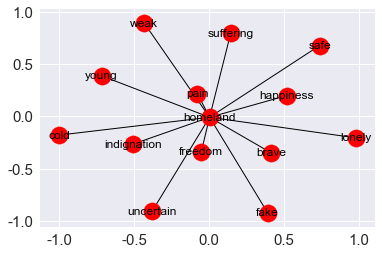

In [1060]:
nx.draw_networkx(g_nation_label)

#### 1950-1979

In [1079]:
g2 = wordCooccurrence(poem_2['jieba_tokenized'][:100].sum())

In [1084]:
g2.remove_edges_from([(n1, n2) for n1, n2, d in g2.edges(data = True) if d['weight'] <= 200])
g2.remove_nodes_from(list(nx.isolates(g2))) #since we are changing the graph list() evaluates the isolates first
giant_2 = max(nx.connected_component_subgraphs(g2), key=len) # keep just the giant connected component
print(nx.info(giant_2))

Name: 
Type: Graph
Number of nodes: 1804
Number of edges: 6338
Average degree:   7.0266


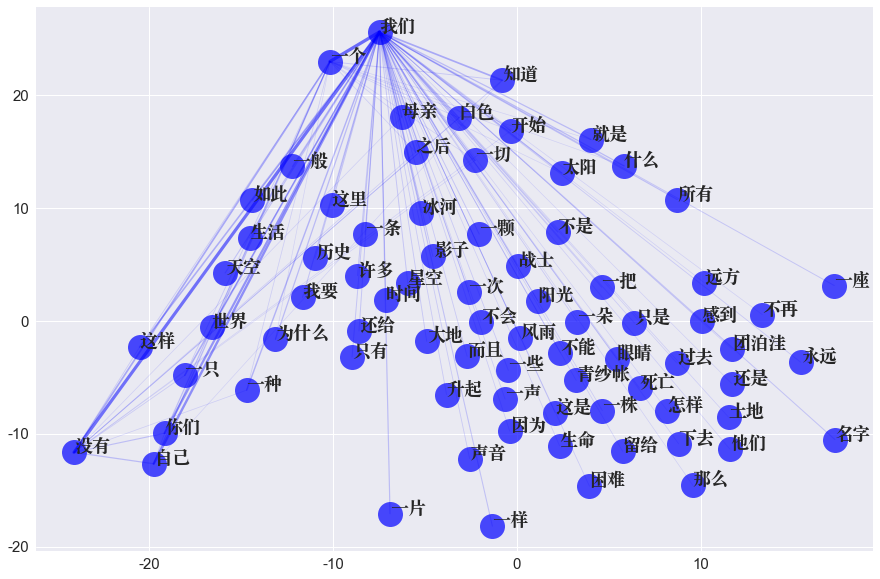

In [1065]:
TSNE_based_network_plot(giant_2)

In [ ]:
gg2 = g2.copy()

In [1112]:
g_sun = g2.subgraph(['太阳'] + list(g2.neighbors('太阳')))

In [1113]:
print(nx.info(g_sun))

Name: 
Type: SubGraph
Number of nodes: 93
Number of edges: 2329
Average degree:  50.0860


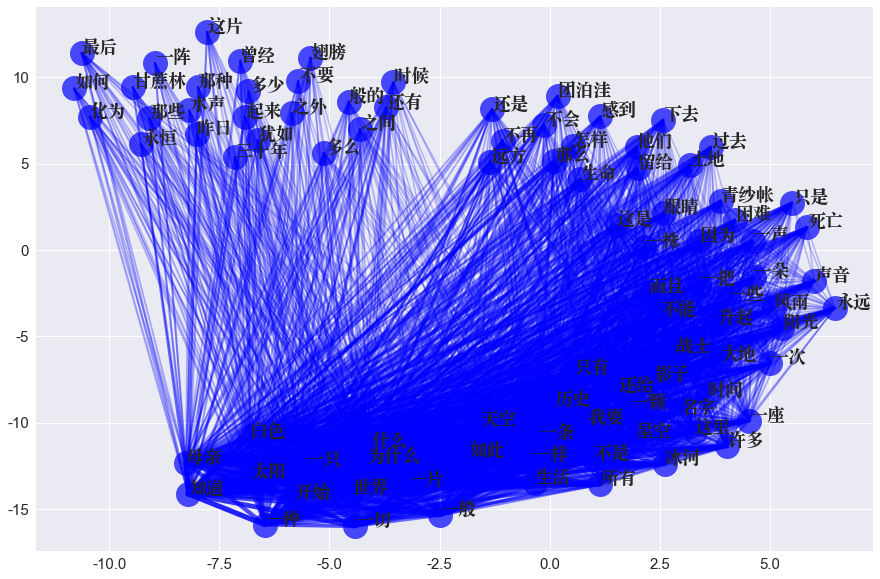

In [1114]:
TSNE_based_network_plot(g_sun)

In [1115]:
gNA_2 = posCooccurrence(poem_2['jieba_tokenized'], 'ns', 'a')

In [1116]:
print(nx.info(gNA_2))

Name: 
Type: Graph
Number of nodes: 2092
Number of edges: 59905
Average degree:  57.2706


In [1117]:
gNA_2.remove_edges_from([(n1,n2) for n1,n2,d in gNA_2.edges(data = True) if gNA_2.nodes[n1]['bipartite'] == gNA_2.nodes[n2]['bipartite']])

In [1118]:
gNA_2.remove_edges_from([(n1, n2) for n1, n2, d in gNA_2.edges(data = True) if d['weight'] <= 6])
gNA_2.remove_nodes_from([n for n in gNA_2.nodes if len(set(gNA_2.neighbors(n))) <= 5])

In [1119]:
print(nx.info(gNA_2))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 275
Average degree:  10.7843


In [1120]:
g_sun2 = gNA_2.subgraph(['太阳'] + list(gNA_2.neighbors('太阳')))

In [1121]:
print(nx.info(g_sun2))

Name: 
Type: SubGraph
Number of nodes: 32
Number of edges: 31
Average degree:   1.9375


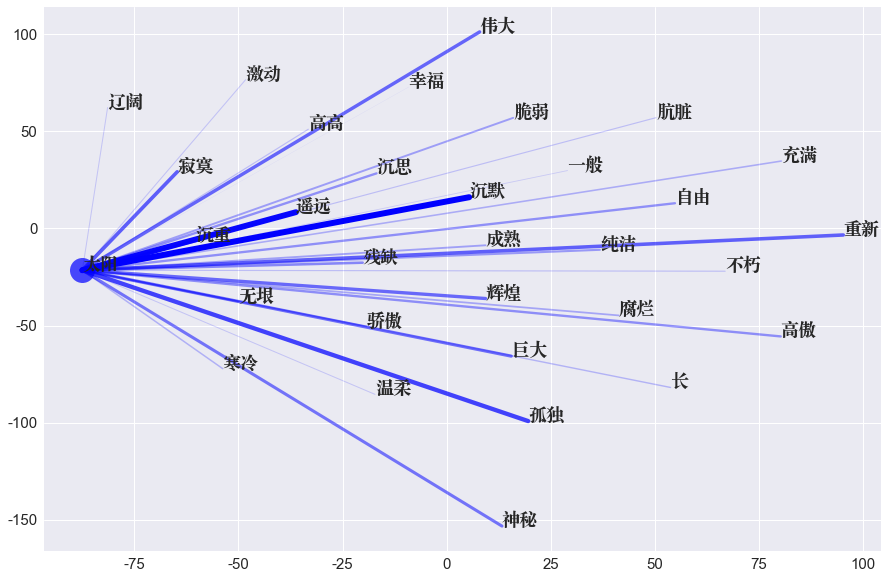

In [1127]:
TSNE_based_network_plot(g_sun2)

In [1128]:
print (g_sun2.nodes())

['幸福', '沉默', '肮脏', '温柔', '纯洁', '沉重', '自由', '充满', '长', '高傲', '激动', '重新', '孤独', '辽阔', '巨大', '遥远', '辉煌', '残缺', '成熟', '高高', '不朽', '一般', '脆弱', '寒冷', '神秘', '伟大', '沉思', '无垠', '寂寞', '腐烂', '骄傲', '太阳']


In [1129]:
start = 1
g_sun2_num = nx.convert_node_labels_to_integers(g_sun2,first_label=start)
print (g_sun2_num.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [1130]:
mapping = {1:'happiness', 2:'silent',3:'dirty', 4:'gentle',5:'pure',6:'heavy',7:'free', 8:'fulfill',9:'long',10:'pride',11:'exciting',12:'again',13:'alone',14:'vast',15:'giant',16:'far',17:'glouris',18:'broken',19:'mature',20:'high',21:'immortal',22:'sameAs',23:'fragile',24:'cold',25:'mysterious',26:'great',27:'meditate',28:'boundless',29:'lonely',30:'rotten',31:'proud',32:'sun'}

In [1131]:
g_sun2_label = nx.relabel_nodes(g_sun2_num, mapping)

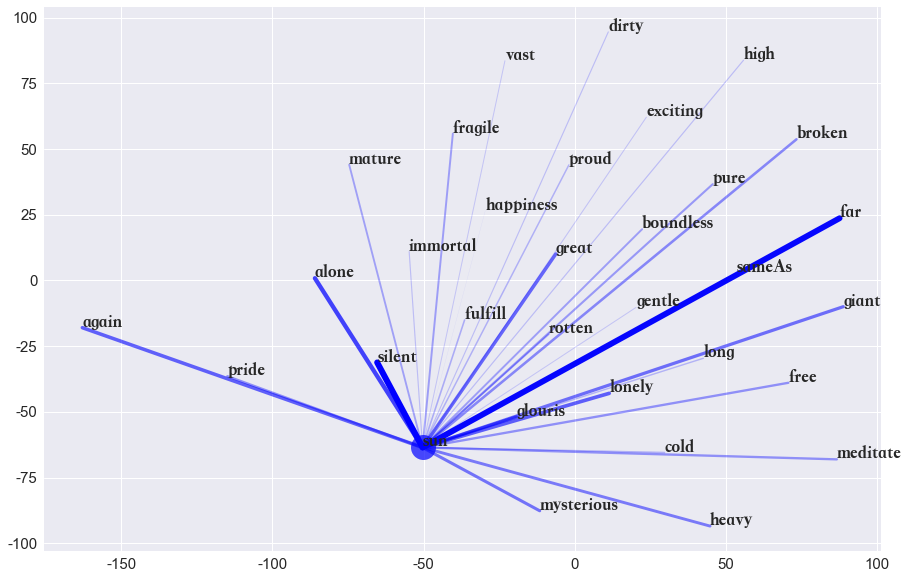

In [1136]:
TSNE_based_network_plot(g_sun2_label)

#### After 1980

In [1137]:
gNN_3 = posCooccurrence(poem_3['jieba_tokenized'], 'ns', 'n')

In [1184]:
print(nx.info(gNN_3))

Name: 
Type: Graph
Number of nodes: 147
Number of edges: 2106
Average degree:  28.6531


In [1183]:
gNN_3.remove_edges_from([(n1, n2) for n1, n2, d in gNN_3.edges(data = True) if d['weight'] <= 160])
gNN_3.remove_nodes_from([n for n in gNN_3.nodes if len(set(gNN_3.neighbors(n))) <= 5])

In [1185]:
g_sun3 = gNN_3.subgraph(['太阳'] + list(gNN_3.neighbors('太阳')))

In [1186]:
print(nx.info(g_sun3))

Name: 
Type: SubGraph
Number of nodes: 81
Number of edges: 1468
Average degree:  36.2469


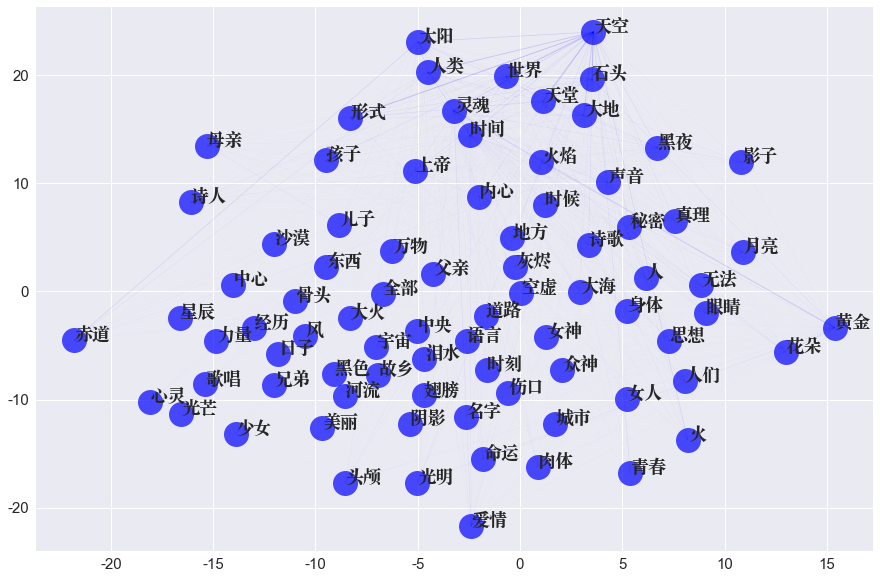

In [1190]:
TSNE_based_network_plot(g_sun3)

In [1192]:
print (g_sun3.nodes())

['父亲', '灰烬', '秘密', '人', '光明', '形式', '少女', '大海', '儿子', '青春', '眼睛', '风', '身体', '名字', '爱情', '火焰', '赤道', '力量', '时刻', '城市', '黑夜', '人们', '歌唱', '阴影', '天堂', '众神', '地方', '伤口', '头颅', '黄金', '石头', '泪水', '心灵', '灵魂', '天空', '声音', '女神', '诗歌', '经历', '东西', '真理', '无法', '中心', '宇宙', '肉体', '翅膀', '大火', '时候', '母亲', '全部', '思想', '故乡', '女人', '诗人', '空虚', '语言', '沙漠', '万物', '中央', '大地', '上帝', '星辰', '兄弟', '美丽', '骨头', '道路', '孩子', '内心', '影子', '黑色', '花朵', '世界', '火', '月亮', '人类', '时间', '日子', '河流', '命运', '太阳', '光芒']


In [1193]:
start = 1
g_sun3_num = nx.convert_node_labels_to_integers(g_sun3,first_label=start)
print (g_sun3_num.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]


In [1198]:
mapping = {1:'father',2:'ash',3:'secret',4:'person',5:'light',6:'form',7:'girl',8:'sea',9:'youth',10:'eye',11:'wind',12:'body',13:'name',14:'love',15:'flame',16:'equater',17:'power',18:'time',19:'city',20:'night',21:'people',22:'sing',23:'shadow',24:'heaven',25:'god',26:'place',27:'wound',28:'head',29:'gold',30:'stone',31:'tear',32:'heart',33:'soul',34:'sky',35:'voice',36:'goddess',37:'poem',38:'experience',39:'thing',40:'truth',41:'unable',42:'center',43:'universe',44:'body',45:'wing',46:'fire',47:'time',48:'mother',49:'all',50:'thought',51:'hometown',52:'women',53:'poet',54:'empty',55:'language',56:'desert',57:'everything',58:'middle',59:'land',60:'gods',61:'star',62:'brother',63:'beauty',64:'bone',65:'road',66:'kid',67:'inward',68:'shadow',69:'black',70:'flower',71:'world',72:'fire',73:'moon',74:'humanbeing',75:'moment',76:'days',77:'river',78:'fate',79:'radiance',80:'sun',81:'land'}

In [1199]:
g_sun3_label = nx.relabel_nodes(g_sun3_num, mapping)

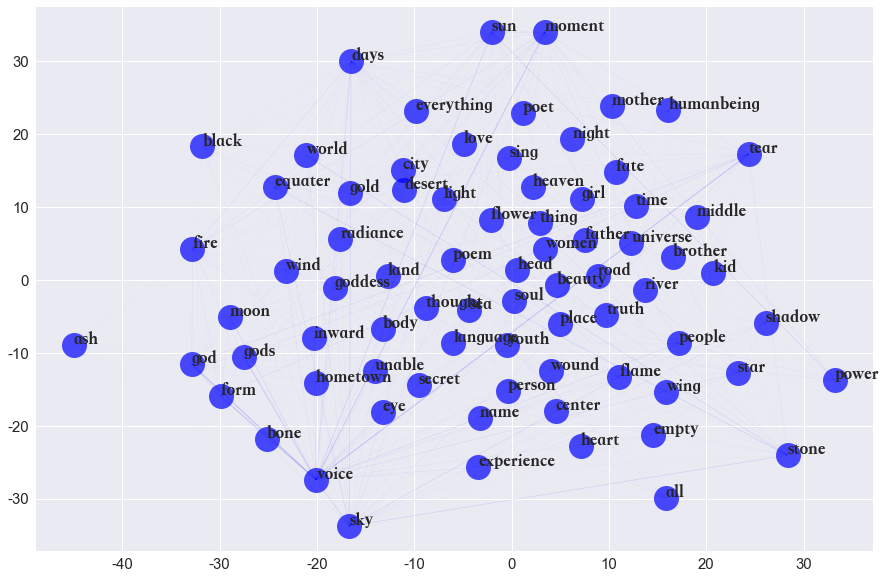

In [1205]:
TSNE_based_network_plot(g_sun3_label)